# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [117]:
#This file will generate data for training
#Temperature values range from 20C (death) to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    return  random.randrange(0, 100)

def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

def get_Label(age, temp, hr):
    label=0
    if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 6<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
        label=1
        return label

    return label

def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'Heart rate', 'Label'])
    for n in range(1, 300):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'Heart rate', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())
        
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')


# Data Visualisation

<AxesSubplot:xlabel='Age', ylabel='Heart rate'>

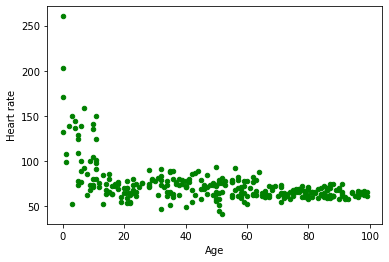

In [118]:
Data_Train.plot(kind='scatter',x='Age',y='Heart rate', color ='green')


<AxesSubplot:xlabel='Age', ylabel='Temperature'>

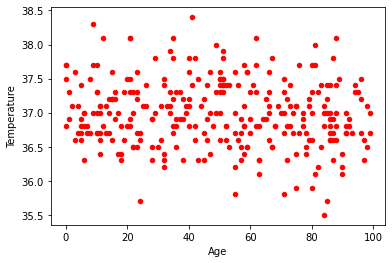

In [119]:
Data_Train.plot(kind='scatter',x='Age',y='Temperature', color ='red')

<AxesSubplot:xlabel='Label'>

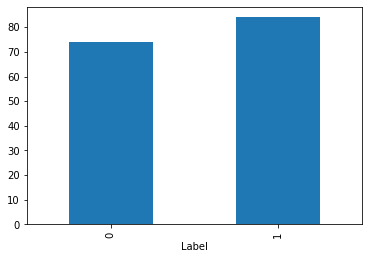

In [120]:
Data_Train.groupby('Label')['Age'].nunique().plot(kind='bar')


In [121]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          299 non-null    int64  
 1   Temperature  299 non-null    float64
 2   Heart rate   299 non-null    float64
 3   Label        299 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [122]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     int64  
 1   Temperature  99 non-null     float64
 2   Heart rate   99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [123]:
Data_Train.head(10)

,Age,Temperature,Heart rate,Label
0,31,36.6,81.2,1
1,11,36.6,101.1,1
2,43,37.5,62.8,0
3,4,36.7,144.8,0
4,21,37.3,58.4,0
5,17,36.4,72.2,0
6,11,36.4,123.9,0
7,93,36.7,57.5,0
8,24,36.7,74.0,1
9,80,37.0,62.7,1


In [124]:
Data_Test.head(10)

,Age,Temperature,Heart rate,Label
0,10,36.2,105.8,0
1,6,37.0,67.3,1
2,98,36.3,62.8,0
3,34,36.1,70.6,0
4,27,37.4,70.9,1
5,68,36.6,65.4,1
6,81,36.4,62.4,0
7,58,37.3,69.3,1
8,26,36.4,66.7,0
9,84,36.7,59.2,0


In [125]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [126]:
Data_Train.describe()

,Age,Temperature,Heart rate,Label
count,299.000000,299.000000,299.000000,299.000000
mean,49.153846,36.986622,73.872575,0.515050
std,28.429763,0.491903,22.727600,0.500611
min,0.000000,35.500000,41.300000,0.000000
25%,23.000000,36.700000,62.700000,0.000000
50%,50.000000,37.000000,68.400000,1.000000
75%,74.500000,37.300000,76.950000,1.000000
max,99.000000,38.400000,260.400000,1.000000


In [127]:
Data_Test.describe()

,Age,Temperature,Heart rate,Label
count,99.000000,99.000000,99.000000,99.000000
mean,50.878788,36.975758,70.962626,0.505051
std,29.390847,0.517271,15.967694,0.502519
min,0.000000,35.900000,36.600000,0.000000
25%,26.500000,36.600000,63.350000,0.000000
50%,49.000000,37.000000,68.200000,1.000000
75%,81.500000,37.300000,72.750000,1.000000
max,98.000000,38.100000,161.300000,1.000000


In [128]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [129]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [130]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [131]:

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train["Label"])
targets_df.columns = ["Label"]

del Data_Train["Label"]

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test['Label'])
test_targets_df.columns = ['Label']

del Data_Test['Label']

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [132]:
train_loader

In [133]:
test_loader

# Building Model

In [141]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.input = nn.Linear(3, 5)
        self.hidden = nn.Linear(5, 5)
        self.output = nn.Linear(5, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.input(x)
        x = self.hidden(x)
        x = self.ReLU(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

model = Network()


In [142]:
model

Network(
  (input): Linear(in_features=3, out_features=5, bias=True)
  (hidden): Linear(in_features=5, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=2, bias=True)
  (ReLU): ReLU()
  (softmax): Softmax(dim=1)
)

# Training Model

In [143]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

In [144]:
# number of epochs to train the model
n_epochs = 200

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,:])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (inf --> 0.736991).  Saving model ...
Epoch: 2 	Training Loss: 0.850761 	Validation Loss: 0.736991
Epoch: 3 	Training Loss: 0.850761 	Validation Loss: 0.736991
Epoch: 4 	Training Loss: 0.850761 	Validation Loss: 0.736991
Epoch: 5 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (0.736991 --> 0.736991).  Saving model ...
Epoch: 6 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (0.736991 --> 0.736991).  Saving model ...
Epoch: 7 	Training Loss: 0.850761 	Validation Loss: 0.736991
Epoch: 8 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (0.736991 --> 0.736991).  Saving model ...
Epoch: 9 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (0.736991 --> 0.736991).  Saving model ...
Epoch: 10 	Training Loss: 0.850761 	Validation Loss: 0.736991
Validation loss decreased (0.736991 --> 0.736991)

Epoch: 95 	Training Loss: 0.692028 	Validation Loss: 0.704677
Epoch: 96 	Training Loss: 0.691918 	Validation Loss: 0.707657
Epoch: 97 	Training Loss: 0.691837 	Validation Loss: 0.705670
Epoch: 98 	Training Loss: 0.691976 	Validation Loss: 0.708439
Epoch: 99 	Training Loss: 0.692069 	Validation Loss: 0.708674
Epoch: 100 	Training Loss: 0.691833 	Validation Loss: 0.707062
Epoch: 101 	Training Loss: 0.691747 	Validation Loss: 0.704374
Epoch: 102 	Training Loss: 0.691867 	Validation Loss: 0.708962
Epoch: 103 	Training Loss: 0.691950 	Validation Loss: 0.710526
Epoch: 104 	Training Loss: 0.692050 	Validation Loss: 0.708185
Epoch: 105 	Training Loss: 0.692066 	Validation Loss: 0.707602
Epoch: 106 	Training Loss: 0.692062 	Validation Loss: 0.707264
Epoch: 107 	Training Loss: 0.691704 	Validation Loss: 0.710855
Epoch: 108 	Training Loss: 0.691759 	Validation Loss: 0.706473
Epoch: 109 	Training Loss: 0.692046 	Validation Loss: 0.707317
Epoch: 110 	Training Loss: 0.692036 	Validation Loss: 0.7065